In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nengo
%matplotlib inline

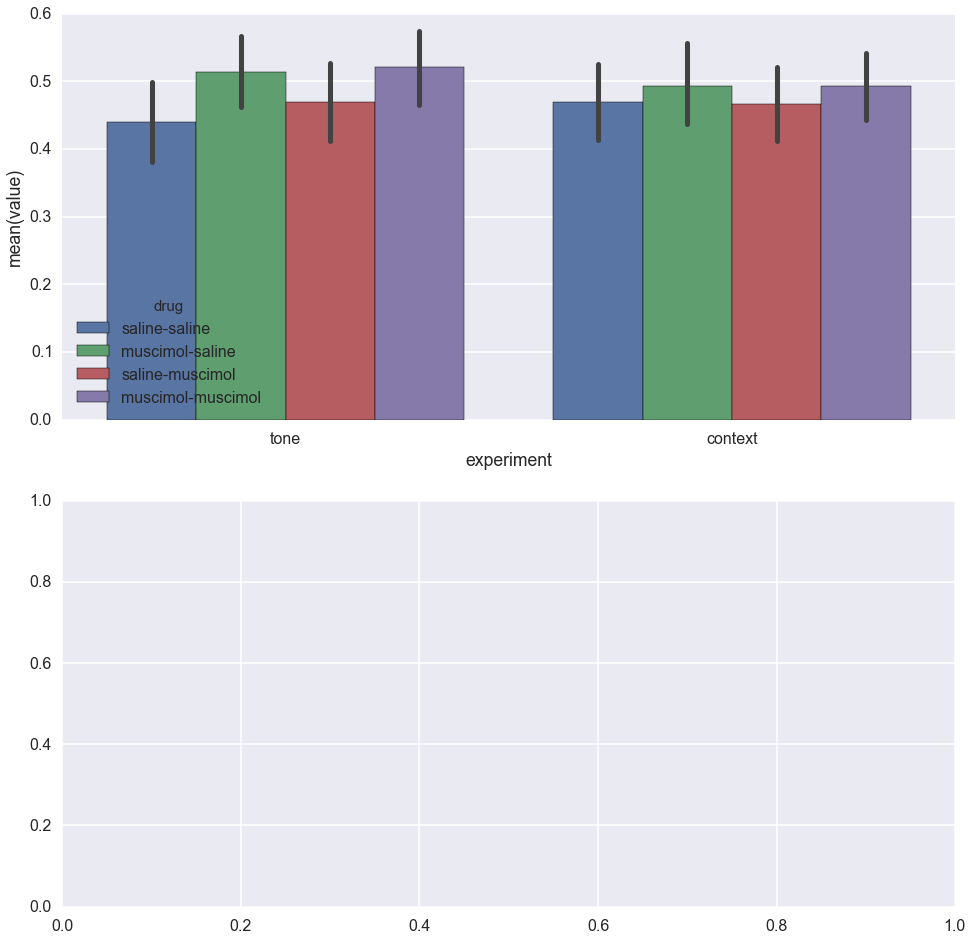

In [55]:
n_trials=100
tips = sns.load_dataset("tips")

columns=('value','experiment','drug')
df = pd.DataFrame(index=np.arange(0, n_trials), columns=columns)

i=0
for exp in ['tone','context']:
    for subj in ['saline-saline','muscimol-saline','saline-muscimol','muscimol-muscimol']:
        for n in range(n_trials):
            df.loc[i]=[np.random.rand(),exp,subj]
            i+=1
# print df

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 16))
sns.set(context='poster')
sns.barplot(x="experiment",y="value",hue='drug',data=df,ax=ax1)


      timepoint  ROI  subject  BOLD signal
0           0.0  IPS        0     0.513433
1           0.0  IPS        1    -0.414368
2           0.0  IPS        2     0.214695
3           0.0  IPS        3     0.814809
4           0.0  IPS        4    -0.894992
5           0.0  IPS        5    -0.073709
6           0.0  IPS        6     3.542734
7           0.0  IPS        7     0.080169
8           0.0  IPS        8     1.547083
9           0.0  IPS        9     2.827153
10          0.0  IPS       10     2.611358
11          0.0  IPS       11    -0.313132
12          0.0  IPS       12     3.773421
13          0.0  IPS       13     4.829915
14          0.0  IPS       14     2.891340
15          0.0  IPS       15    -0.736698
16          0.0  IPS       16     3.316986
17          0.0  IPS       17     3.771426
18          0.0  IPS       18     1.308109
19          0.0  IPS       19    -0.905172
20          0.0   AG        0     1.048369
21          0.0   AG        1     0.980156
22         

c:\Python27\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


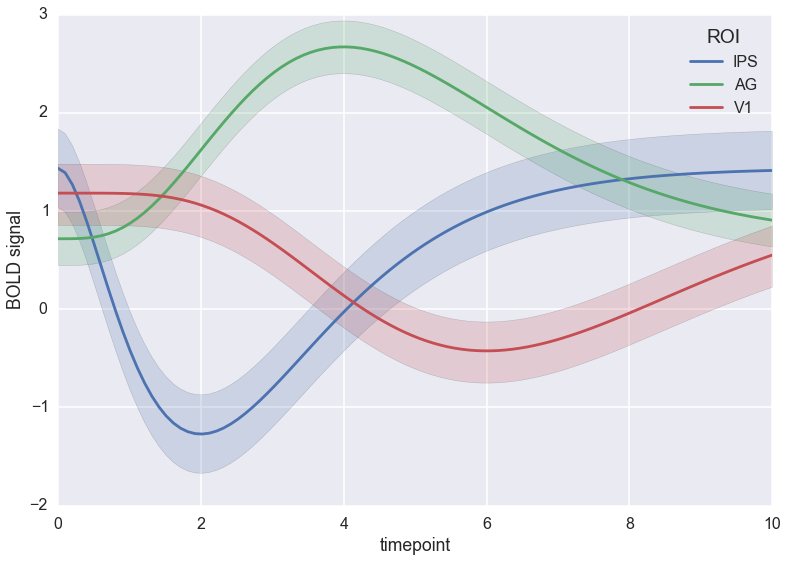

In [57]:
gammas = sns.load_dataset("gammas")
ax = sns.tsplot(time="timepoint", value="BOLD signal",
                 unit="subject", condition="ROI",
                 data=gammas)
print gammas

c:\Python27\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


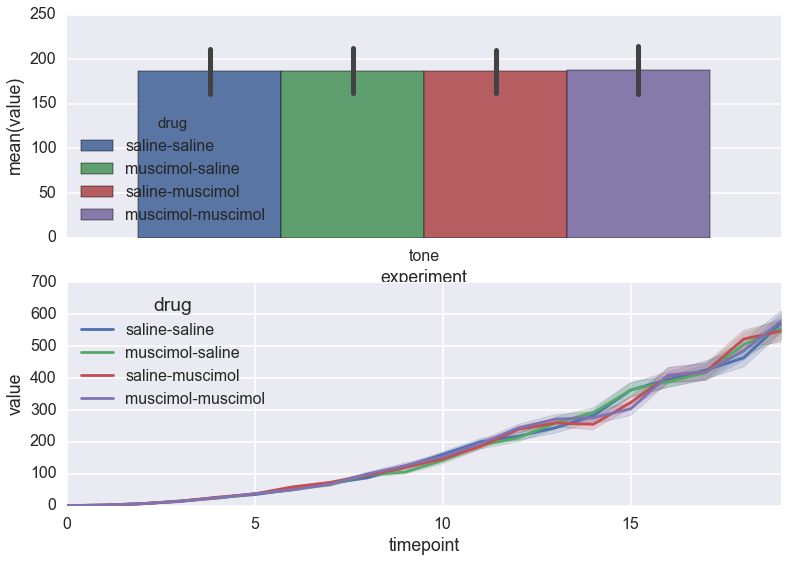

In [4]:
n_trials=10
columns=('value','trial','timepoint','experiment','drug')
dataframe = pd.DataFrame(index=np.arange(0, n_trials), columns=columns)

i=0
for exp in ['tone']:
    for subj in ['saline-saline','muscimol-saline','saline-muscimol','muscimol-muscimol']:
        for n in range(n_trials):
            for t in np.arange(0,20):
                value=t**2+np.random.rand()*t**2
                dataframe.loc[i]=[value,n,t,exp,subj]
                i+=1
# print dataframe
f, (ax1, ax2) = plt.subplots(2, 1)
sns.set(context='poster')
sns.barplot(x="experiment",y="value",hue='drug',data=dataframe,ax=ax1)
sns.tsplot(time="timepoint", value="value",
                 unit="trial", condition="drug",
                 data=dataframe,ax=ax2)

In [5]:
'''Parameters'''
#simulation parameters
n_trials=10
pairings_train=10
tones_test=5
drug='saline-saline' #default, changed with gaba_function(t)
gaba_muscimol=1.1 #1.5 -> identical gaba responses, 1.0 -> muscimol saline = saline-saline
dt=0.001 #timestep
dt_sample=0.01 #probe sample_every

#ensemble parameters
N=100 #neurons for ensembles
dim=1 #dimensions for ensembles
tau_stim=0.01 #synaptic time constant of stimuli to populations
tau=0.01 #synaptic time constant between ensembles
condition_PES_rate = 5e-4 #first order conditioning learning rate
# condition_BCM_rate = 5e-10 #first order conditioning learning rate
# extinction_rate = 5e-7 #extinction learning rate
tau_learn=0.01
tau_drug=0.1
tau_GABA=0.005 #synaptic time constant for GABAergic cells
tau_Glut=0.01 #combination of AMPA and NMDA
tau_LA_recurrent=0.005 #same as GABAergic cells, could be shorter b/c of locality
T_error=0.2
gaba_min=0.2

#stimuli
tt=10.0/60.0 #tone time
nt=7.0/60.0 #nothing time #experiment nt=9.5/60,st=0.5/60,n2t=0
st=2.0/60.0 #shock time
n2t=1.0/60.0 #nothing time
wt=1.0 #wait/delay time
t_train=int(pairings_train*(wt+tt)/dt)*dt
t_test=t_train*tones_test/pairings_train #multiply by X/pairings for X tone presentations
print t_train

11.666


In [6]:
timesteps=np.arange(int(t_train/dt_sample),int((t_train+t_test)/dt_sample))
print timesteps

[1166 1167 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180
 1181 1182 1183 1184 1185 1186 1187 1188 1189 1190 1191 1192 1193 1194 1195
 1196 1197 1198 1199 1200 1201 1202 1203 1204 1205 1206 1207 1208 1209 1210
 1211 1212 1213 1214 1215 1216 1217 1218 1219 1220 1221 1222 1223 1224 1225
 1226 1227 1228 1229 1230 1231 1232 1233 1234 1235 1236 1237 1238 1239 1240
 1241 1242 1243 1244 1245 1246 1247 1248 1249 1250 1251 1252 1253 1254 1255
 1256 1257 1258 1259 1260 1261 1262 1263 1264 1265 1266 1267 1268 1269 1270
 1271 1272 1273 1274 1275 1276 1277 1278 1279 1280 1281 1282 1283 1284 1285
 1286 1287 1288 1289 1290 1291 1292 1293 1294 1295 1296 1297 1298 1299 1300
 1301 1302 1303 1304 1305 1306 1307 1308 1309 1310 1311 1312 1313 1314 1315
 1316 1317 1318 1319 1320 1321 1322 1323 1324 1325 1326 1327 1328 1329 1330
 1331 1332 1333 1334 1335 1336 1337 1338 1339 1340 1341 1342 1343 1344 1345
 1346 1347 1348 1349 1350 1351 1352 1353 1354 1355 1356 1357 1358 1359 1360
 1361 1362 1

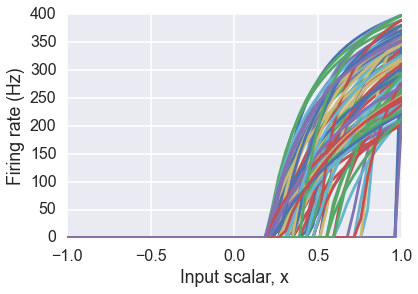

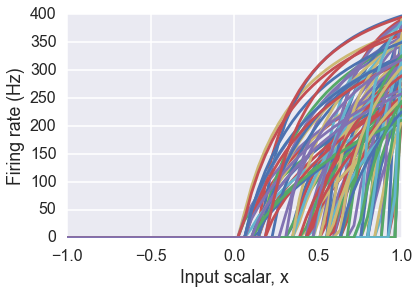

In [17]:
from nengo.dists import Choice,Exponential,Uniform
from nengo.utils.ensemble import tuning_curves

dim=1
N=100
thresh_error=0.2
model = nengo.Network()
with model:
    error_on_exp = nengo.Ensemble(N, dim, encoders=Choice([[1]]),
            intercepts=Exponential(scale=(1 - thresh_error) / 5.0, shift=thresh_error, high=1),
            eval_points=Uniform(thresh_error, 1.1), n_eval_points=5000)
    error_on_uniform=nengo.Ensemble(N,dim,encoders=Choice([[1]]), intercepts=Uniform(0, 1))
sim = nengo.Simulator(model)

eval_points, activities = tuning_curves(error_on_exp, sim)
plt.plot(eval_points, activities)
# We could have alternatively shortened this to
# plt.plot(*tuning_curves(ens_1d, sim))
plt.ylabel("Firing rate (Hz)")
plt.xlabel("Input scalar, x");
plt.show()

eval_points, activities = tuning_curves(error_on_uniform, sim)
plt.plot(eval_points, activities)
# We could have alternatively shortened this to
# plt.plot(*tuning_curves(ens_1d, sim))
plt.ylabel("Firing rate (Hz)")
plt.xlabel("Input scalar, x");
plt.show()